## Assignment - 2
### NUMERICAL COMPUTING
_________________________________
#### Name: Ghulam Mustafa
#### Roll No: FA22/BSCS/188
#### Section: E
_________________________________

        imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## General Codes:

###   Bisection Method

In [2]:
def bisection_method(f, a, b, tol=1e-6, max_iter=100):
    steps = []
    for i in range(max_iter):
        c = (a + b) / 2
        steps.append(c)
        if abs(f(c)) < tol or (b - a)/2 < tol:
            return c, i + 1, steps
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return c, max_iter, steps

### Newton Raphson Method

In [3]:
def newton_raphson_method(f, df, x0, tol=1e-6, max_iter=100):
    steps = [x0]
    for i in range(max_iter):
        if df(x0) == 0:
            raise ZeroDivisionError("Derivative is zero.")
        x1 = x0 - f(x0) / df(x0)
        steps.append(x1)
        if abs(x1 - x0) < tol:
            return x1, i + 1, steps
        x0 = x1

### Secant Method

In [4]:
def secant_method(f, x0, x1, tol=1e-6, max_iter=100):
    steps = [x0, x1]
    for i in range(max_iter):
        if f(x1) - f(x0) == 0:
            raise ZeroDivisionError("Denominator became zero.")
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        steps.append(x2)
        if abs(x2 - x1) < tol:
            return x2, i + 1, steps
        x0, x1 = x1, x2
    return x2, max_iter, steps

### Secant Method

In [5]:
def fixed_point_iteration(g, x0, tol=1e-6, max_iter=100):
    steps = [x0]
    for i in range(max_iter):
        x1 = g(x0)
        steps.append(x1)
        if abs(x1 - x0) < tol:
            return x1, i + 1, steps
        x0 = x1
    return x1, max_iter, steps

_________________________________________

##  f(x) = x^3 - x - 2

        Helping FUnctions

In [9]:
def f(x): return x**3 - x - 2
def df(x): return 3 * x**2 - 1
def g(x): return (x + 2) ** (1/3)

In [22]:
def print_table(method, steps):
    print(f"\n--- {method} Iteration Table ---")
    print(f"{'Iter':<6} {'x':<12} {'f(x)':<12}")
    print("-" * 32)
    for i, x in enumerate(steps):
        print(f"{i:<6} {x:<12.4f} {f(x):<12.4f}")

_________


### Bisection Method

In [23]:
def bisection(a, b, tol=1e-6, max_iter=100):
    steps = []
    for i in range(max_iter):
        c = (a + b) / 2
        steps.append(c)
        if abs(f(c)) < tol:
            break
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return c, i+1, steps

In [24]:
b_root, b_iters, b_steps = bisection(1, 2)
print(f"\nBisection Method:\n  Root = {b_root:.4f}\n  Iterations = {b_iters}")
print_table("Bisection", b_steps)


Bisection Method:
  Root = 1.5214
  Iterations = 22

--- Bisection Iteration Table ---
Iter   x            f(x)        
--------------------------------
0      1.5000       -0.1250     
1      1.7500       1.6094      
2      1.6250       0.6660      
3      1.5625       0.2522      
4      1.5312       0.0591      
5      1.5156       -0.0341     
6      1.5234       0.0123      
7      1.5195       -0.0110     
8      1.5215       0.0006      
9      1.5205       -0.0052     
10     1.5210       -0.0023     
11     1.5212       -0.0008     
12     1.5214       -0.0001     
13     1.5214       0.0003      
14     1.5214       0.0001      
15     1.5214       -0.0000     
16     1.5214       0.0000      
17     1.5214       0.0000      
18     1.5214       -0.0000     
19     1.5214       0.0000      
20     1.5214       0.0000      
21     1.5214       0.0000      


### Newton-Raphson Method

In [ ]:
def newton_raphson(x0, tol=1e-6, max_iter=100):
    steps = [x0]
    for i in range(max_iter):
        if df(x0) == 0: break
        x1 = x0 - f(x0) / df(x0)
        steps.append(x1)
        if abs(x1 - x0) < tol:
            break
        x0 = x1
    return x1, i+1, steps

In [25]:
n_root, n_iters, n_steps = newton_raphson(1.5)
print(f"\nNewton-Raphson Method:\n  Root = {n_root:.4f}\n  Iterations = {n_iters}")
print_table("Newton-Raphson", n_steps)



Newton-Raphson Method:
  Root = 1.5214
  Iterations = 3

--- Newton-Raphson Iteration Table ---
Iter   x            f(x)        
--------------------------------
0      1.5000       -0.1250     
1      1.5217       0.0021      
2      1.5214       0.0000      
3      1.5214       0.0000      


### Secant Method

In [16]:
def secant(x0, x1, tol=1e-6, max_iter=100):
    steps = [x0, x1]
    for i in range(max_iter):
        if f(x1) - f(x0) == 0: break
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        steps.append(x2)
        if abs(x2 - x1) < tol:
            break
        x0, x1 = x1, x2
    return x2, i+1, steps


In [26]:
s_root, s_iters, s_steps = secant(1, 2)
print(f"\nSecant Method:\n  Root = {s_root:.4f}\n  Iterations = {s_iters}")
print_table("Secant", s_steps)



Secant Method:
  Root = 1.5214
  Iterations = 7

--- Secant Iteration Table ---
Iter   x            f(x)        
--------------------------------
0      1.0000       -2.0000     
1      2.0000       4.0000      
2      1.3333       -0.9630     
3      1.4627       -0.3333     
4      1.5312       0.0586      
5      1.5209       -0.0027     
6      1.5214       -0.0000     
7      1.5214       0.0000      
8      1.5214       -0.0000     


### Fixed-Point Iteration

In [17]:
def fixed_point(x0, tol=1e-6, max_iter=100):
    steps = [x0]
    for i in range(max_iter):
        x1 = g(x0)
        steps.append(x1)
        if abs(x1 - x0) < tol:
            break
        x0 = x1
    return x1, i+1, steps

In [27]:
f_root, f_iters, f_steps = fixed_point(1.5)
print(f"\nFixed-Point Iteration:\n  Root = {f_root:.4f}\n  Iterations = {f_iters}")
print_table("Fixed-Point", f_steps)


Fixed-Point Iteration:
  Root = 1.5214
  Iterations = 7

--- Fixed-Point Iteration Table ---
Iter   x            f(x)        
--------------------------------
0      1.5000       -0.1250     
1      1.5183       -0.0183     
2      1.5209       -0.0026     
3      1.5213       -0.0004     
4      1.5214       -0.0001     
5      1.5214       -0.0000     
6      1.5214       -0.0000     
7      1.5214       -0.0000     


In [30]:
def plot_fixed_point(steps):
    x_vals = np.linspace(1.4, 1.55, 400)
    plt.plot(x_vals, g(x_vals), label='g(x)', color='blue')
    plt.plot(x_vals, x_vals, label='y = x', linestyle='--', color='gray')
    
    x_points = steps[:-1]
    y_points = steps[1:]

    for i in range(len(x_points)):
        plt.plot([x_points[i], x_points[i]], [x_points[i], y_points[i]], color='red')
        plt.plot([x_points[i], y_points[i]], [y_points[i], y_points[i]], color='red')

    plt.scatter(steps, steps, color='black')
    plt.title('Fixed-Point Iteration Visualization')
    plt.xlabel('x')
    plt.ylabel('g(x)')
    plt.grid(True)
    plt.legend()
    plt.show()


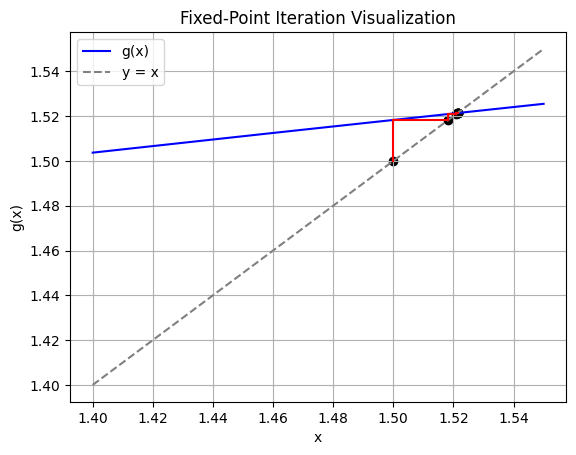

In [31]:
plot_fixed_point(f_steps)